In [117]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from tqdm.auto import tqdm
import huggingface_hub as hf
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from typing import List, Dict, Union, Tuple
from transformers import AutoTokenizer, AutoModel

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 128)

plt.style.use('seaborn-v0_8')
load_dotenv()
hf.login(os.environ["HF_TOKEN"])
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
print("CUDA_VISIBLE_DEVICES:", os.environ["CUDA_VISIBLE_DEVICES"], "HF_HOME:", os.environ["HF_HOME"])

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/mohsenfayyaz/.cache/huggingface/token
Login successful
CUDA_VISIBLE_DEVICES: 7 HF_HOME: /local1/mohsenfayyaz/.hfcache/


In [118]:
# DATASET = "re-docred_facebook--contriever-msmarco_7170.pkl"
DATASET = "re-docred_facebook--dragon-plus-query-encoder_7170.pkl"
# DATASET = "re-docred_OpenMatch--cocodr-base-msmarco_7170.pkl.gz"

hf.hf_hub_download(repo_id="Retriever-Contextualization/datasets", filename=f"results/{DATASET}", repo_type="dataset", local_dir="hf/")
df_raw = pd.read_pickle(f"./hf/results/{DATASET}")
print(df_raw.attrs)
df_raw.head(1)

{'model': 'facebook/dragon-plus-query-encoder', 'query_model': 'facebook/dragon-plus-query-encoder', 'context_model': 'facebook/dragon-plus-context-encoder', 'pooling': 'cls', 'dataset': 're-docred', 'corpus_size': 105925, 'eval': {'ndcg': {'NDCG@1': 0.47685, 'NDCG@3': 0.52523, 'NDCG@5': 0.53646, 'NDCG@10': 0.54955, 'NDCG@100': 0.58002, 'NDCG@1000': 0.59556}, 'map': {'MAP@1': 0.47685, 'MAP@3': 0.51341, 'MAP@5': 0.51959, 'MAP@10': 0.52496, 'MAP@100': 0.53058, 'MAP@1000': 0.53109}, 'recall': {'Recall@1': 0.47685, 'Recall@3': 0.55941, 'Recall@5': 0.58689, 'Recall@10': 0.62748, 'Recall@100': 0.77741, 'Recall@1000': 0.90349}, 'precision': {'P@1': 0.47685, 'P@3': 0.18647, 'P@5': 0.11738, 'P@10': 0.06275, 'P@100': 0.00777, 'P@1000': 0.0009}}}


,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles,hit_rank,gold_doc,gold_doc_title,gold_doc_text,gold_doc_score,pred_doc,pred_doc_title,pred_doc_text,pred_doc_score,gold_doc_len,pred_doc_len,query_decompx_tokens,query_decompx_tokenizer_word_ids,query_decompx_cls_or_mean_pooled,query_decompx_tokens_dot_scores,query_decompx_decompx_last_layer_pooled,gold_doc_decompx_tokens,gold_doc_decompx_tokenizer_word_ids,gold_doc_decompx_cls_or_mean_pooled,gold_doc_decompx_tokens_dot_scores,gold_doc_decompx_decompx_last_layer_pooled,pred_doc_decompx_tokens,pred_doc_decompx_tokenizer_word_ids,pred_doc_decompx_cls_or_mean_pooled,pred_doc_decompx_tokens_dot_scores,pred_doc_decompx_decompx_last_layer_pooled
0,test0,When was Loud Tour published?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the fourth overall and third world concert tour by Barbadian recording artist Riha...,"{'len': 1000, 'max': 390.3378601074219, 'min': 377.525390625, 'std': 1.243663421340353, 'mean': 378.77503692626954, 'median'...",{'Loud Tour': 390.3378601074219},"{'Loud Tour': 390.3378601074219, 'Loud'n'proud': 385.71905517578125, 'Poetry Bus Tour': 385.4292907714844, 'Live &amp; Loud'...",{'Loud Tour': {'text': 'The Loud Tour was the fourth overall and third world concert tour by Barbadian recording artist Riha...,test0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index': '0_0'}, {'name': 'Loud To...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}, {'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1]}, {'r': 'P131', 'h': 10, '...","[[The, Loud, Tour, was, the, fourth, overall, and, third, world, concert, tour, by, Barbadian, recording, artist, Rihanna, ....",test,"{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}",0,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index': '0_0'}, {'name': 'Loud Tou...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': 1, 'name': '2010', 'global_pos': [43, 43], 'index': '6_0'}]","{Loud, Loud Tour}",{2010},Loud Tour,2010,{MISC},{TIME},[1],"[[Performing, in, over, twenty, countries, in, the, Americas, and, Europe, ,, the, tour, was, launched, in, support, of, Rih...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': 1, 'type': 'MISC', 'global_pos': [41, 41], 'index': '0_0'}]","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': 1, 'name': '2010', 'global_pos': [43, 43], 'index': '6_0'}]",P577,publication date,When was Loud Tour published?,0,{},1.0,Loud Tour The Loud Tour was the fourth overall and third world concert tour by Barbadian recording artist Rihanna . Performi...,Loud Tour,The Loud Tour was the fourth overall and third world concert tour by Barbadian recording artist Rihanna . Performing in over...,390.33786,Loud Tour The Loud Tour was the fourth overall and third world concert tour by Barbadian recording artist Rihanna . Performi...,Loud Tour,The Loud Tour was the fourth overall and third world concert tour by Barbadian recording artist Rihanna . Performing in over...,390.33786,142,142,"[[CLS], when, was, loud, tour, published, ?, [SEP]]","[None, 0, 1, 2, 3, 4, 4, None]","[-0.17805682, -0.3927267, 0.34883702, -0.38739026, -0.23735791, -0.19460969, 0.21865264, 0.068975255, -0.1592264, 0.18711175...","[2.2196622, 6.71451, 0.9866385, 58.316944, 37.08578, 4.3126516, 1.2738111, -1.2307678]","[[0.0026502553, 0.044497166, 0.009840142, -0.029498188, 0.047593728, 0.0005243204, 0.089234896, -0.058340102, -0.0002567456,...","[[CLS], loud, tour, the, loud, tour, was, the, fourth, overall, and, third, world, concert, tour, by, bar, ##bad, ##ian, rec...","[

In [119]:
def generate_query_question(head_entity, tail_entity, relation_type):
    relation_mapping = {
        'P6': f'Who is the head of government of {head_entity}?',                 # Invertible
        'P17': f'Which country is {head_entity} associated with?',
        'P19': f'Where was {head_entity} born?',
        'P20': f'Where did {head_entity} die?',
        'P22': f'Who is the father of {head_entity}?',
        'P25': f'Who is the mother of {head_entity}?',
        'P26': f'Who is the spouse of {head_entity}?',                            # Invertible
        'P27': f'Which country is {head_entity} a citizen of?',                   # Could have multiple answers
        'P30': f'Which continent is {head_entity} part of?',
        'P31': f'What is {head_entity} an instance of?',                          # Could have multiple answers
        'P35': f'Who is the head of state of {head_entity}?',                     # Invertible
        'P36': f'What is the capital of {head_entity}?',                          # Invertible
        'P37': f'What is the official language of {head_entity}?',
        'P39': f'What position did {head_entity} hold?',                          # Could have multiple answers
        'P40': f'Who are the children of {head_entity}?',                         # Could have multiple answers
        'P50': f'Who is the author of {head_entity}?',                            # Could have multiple answers (not likely in DocRED)
        'P54': f'Which sports team is {head_entity} a member of?',                # Could have multiple answers (not likely in DocRED)
        'P57': f'Who directed {head_entity}?',                                    # Could have multiple answers (not likely in DocRED)
        'P58': f'Who wrote the screenplay for {head_entity}?',                    # Could have multiple answers (not likely in DocRED)
        'P69': f'Where was {head_entity} educated?',                              # Could have multiple answers
        'P86': f'Who composed the music for {head_entity}?',
        'P102': f'Which political party is {head_entity} a member of?',           # Could have multiple answers (not likely in DocRED)
        'P108': f'Who is the employer of {head_entity}?',
        'P112': f'Who founded {head_entity}?',                                    # Could have multiple answers, Invertible
        'P118': f'Which league is {head_entity} part of?',
        'P123': f'Who is the publisher of {head_entity}?',
        'P127': f'Who owns {head_entity}?',                                       # Could have multiple answers
        'P131': f'Which administrative territorial entity is {head_entity} located in?', # Could have multiple answers
        'P136': f'What genre does {head_entity} belong to?',                      # Could have multiple answers (not likely in DocRED)
        'P137': f'Who operates {head_entity}?',
        'P140': f'What is the religion of {head_entity}?',                        # Could have multiple answers (not likely in DocRED)
        # 'P150': f'What administrative territorial entity is contained within {head_entity}?', # Extreme Many-to-many (DISCARD THIS TYPE)
        'P155': f'What precedes {head_entity}?',
        'P156': f'What follows {head_entity}?',
        'P159': f'Where is the headquarters of {head_entity} located?',
        'P161': f'Who is a cast member of {head_entity}?',
        'P162': f'Who produced {head_entity}?',                                   # Could have multiple answers
        'P166': f'What award did {head_entity} receive?',                         # Could have multiple answers (not likely in DocRED)
        'P170': f'Who created {head_entity}?',                                    # Could have multiple answers (not likely in DocRED)
        'P171': f'What is the parent taxon of {head_entity}?',                    # Could have multiple answers (not likely in DocRED)
        'P172': f'What is the ethnic group of {head_entity}?',                    # Could have multiple answers (not likely in DocRED)
        'P175': f'Who performed {head_entity}?',
        'P176': f'Who manufactured {head_entity}?',
        'P178': f'Who developed {head_entity}?',
        'P179': f'What series is {head_entity} part of?',
        'P190': f'What is the sister city of {head_entity}?',
        'P194': f'What is the legislative body of {head_entity}?',
        'P205': f'What country is the basin of {head_entity}?',
        'P206': f'Where is {head_entity} located in or next to a body of water?',
        'P241': f'Which military branch is {head_entity} part of?',
        'P264': f'Which record label is {head_entity} associated with?',
        'P272': f'Which production company produced {head_entity}?',
        'P276': f'Where is {head_entity} located?',
        'P279': f'What is {head_entity} a subclass of?',
        'P355': f'What is the subsidiary of {head_entity}?',                      # Could have multiple answers
        'P361': f'What is {head_entity} a part of?',
        'P364': f'What is the original language of {head_entity}?',
        'P400': f'What platform is {head_entity} available on?',                  # Could have multiple answers
        'P403': f'What is the mouth of the watercourse of {head_entity}?',
        'P449': f'What is the original network of {head_entity}?',
        'P463': f'Which organization is {head_entity} a member of?',
        'P488': f'Who is the chairperson of {head_entity}?',
        'P495': f'What is the country of origin of {head_entity}?',
        'P527': f'What are the components of {head_entity}?',                     # Could have multiple answers
        'P551': f'Where is the residence of {head_entity}?',
        'P569': f'When was {head_entity} born?',
        'P570': f'When did {head_entity} die?',
        'P571': f'When was {head_entity} founded?',
        'P576': f'When was {head_entity} dissolved or demolished?',
        'P577': f'When was {head_entity} published?',
        'P580': f'When did {head_entity} start?',
        'P582': f'When did {head_entity} end?',
        'P585': f'When did {head_entity} occur?',
        'P607': f'What conflict was {head_entity} part of?',                      # Could have multiple answers
        'P674': f'Who are the characters in {head_entity}?',                      # Could have multiple answers
        'P676': f'Who wrote the lyrics for {head_entity}?',                       # Could have multiple answers
        'P706': f'Where is {head_entity} located on a terrain feature?',
        # 'P710': f'Who participated in {head_entity}?',                            # Extreme Many-to-many (DISCARD THIS TYPE)
        'P737': f'Who influenced {head_entity}?',
        'P740': f'Where was {head_entity} formed?',
        'P749': f'What is the parent organization of {head_entity}?',
        'P800': f'What is a notable work of {head_entity}?',
        'P807': f'What is {head_entity} separated from?',
        'P840': f'Where does the narrative of {head_entity} take place?',
        'P937': f'Where did {head_entity} work?',
        'P1001': f'Which jurisdiction does {head_entity} apply to?',
        'P1056': f'What does {head_entity} produce?',
        'P1198': f'What is the unemployment rate of {head_entity}?',
        'P1336': f'What territory is claimed by {head_entity}?',
        'P1344': f'What was {head_entity} a participant of?',
        'P1365': f'What does {head_entity} replace?',
        'P1366': f'What replaced {head_entity}?',
        'P1376': f'What is {head_entity} the capital of?',                        # BEWARE OF THE DUPLICATION FOR FILTERING (FACT P36 is the same as this one) FIXED
        'P1412': f'What languages are spoken, written, or signed by {head_entity}?',    # Could have multiple answers
        'P1441': f'In what work does {head_entity} appear?',
        'P3373': f'Who is the sibling of {head_entity}?'                          # Could have multiple answers, Invertible (based on each sibling)
    }
    return relation_mapping[relation_type]

relation_clusters = {
    "Human Entities": [
        "P19", "P20", "P22", "P25", "P26", "P27", "P39", "P40", "P54", "P69", "P102", "P140", "P3373",
        "P569", "P570", "P737", "P172"
    ],
    # "Geographical/Political Entities": [
    #     "P6", "P30", "P36", "P140"
    # ],
    # "Organizations": [
    #     "P127", "P276", "P740", "P749", "P112"
    # ],
    # "Creative Works": [
    #     "P50", "P57", "P58", "P86", "P162", "P175", "P800", "P840", "P1441", "P364", "P449", "P123", "P400"
    # ],
    # "Events": [
    #     "P1344", "P607", "P585", "P1365", "P1366", "P585", "P37", "P585"
    # ],
    # "Objects/Artifacts": [
    #     "P170", "P176", "P178", "P179", "P400", "P1056", "P276"
    # ],
    # "Biological Entities": [
    #     "P171", "P172"
    # ]
}

relation_clusters_relation_to_cluster = {relation: cluster for cluster, relations in relation_clusters.items() for relation in relations}

In [120]:
r_q = {}
for cluster, relations in relation_clusters.items():
    r_q[cluster] = []
    for relation in relations:
        r_q[cluster].append(relation + ":" + generate_query_question("X", "", relation))
    print(cluster, r_q[cluster])
    print()
relation_clusters_relation_to_cluster

Human Entities ['P19:Where was X born?', 'P20:Where did X die?', 'P22:Who is the father of X?', 'P25:Who is the mother of X?', 'P26:Who is the spouse of X?', 'P27:Which country is X a citizen of?', 'P39:What position did X hold?', 'P40:Who are the children of X?', 'P54:Which sports team is X a member of?', 'P69:Where was X educated?', 'P102:Which political party is X a member of?', 'P140:What is the religion of X?', 'P3373:Who is the sibling of X?', 'P569:When was X born?', 'P570:When did X die?', 'P737:Who influenced X?', 'P172:What is the ethnic group of X?']



{'P19': 'Human Entities',
 'P20': 'Human Entities',
 'P22': 'Human Entities',
 'P25': 'Human Entities',
 'P26': 'Human Entities',
 'P27': 'Human Entities',
 'P39': 'Human Entities',
 'P40': 'Human Entities',
 'P54': 'Human Entities',
 'P69': 'Human Entities',
 'P102': 'Human Entities',
 'P140': 'Human Entities',
 'P3373': 'Human Entities',
 'P569': 'Human Entities',
 'P570': 'Human Entities',
 'P737': 'Human Entities',
 'P172': 'Human Entities'}

In [138]:
df = df_raw.copy()
df = df[df["evidence_sent_ids"].str.len() == 1]  # 1 Evidence
df = df[df["evidence_sents"].str.len() == 1]  # 1 Evidence Sentence
df = df[df["head_entity_in_evidence"].str.len() >= 1]  # 1 Head in Evidence
df = df[df["head_entity_names"].str.len() == 1]  # All heads have the same name
print(len(df))

# Filter Repeated Labels (Only 1 h->t)
def not_repeated_label(label, labels):
    repeat_count = 0
    for l in labels:
        if l['h'] == label['h'] and l['t'] == label['t']:
            repeat_count += 1
    return True if repeat_count == 1 else False
df["repeated_label"] = df.apply(lambda r: not_repeated_label(r["label"], r["labels"]), axis=1)
df = df[df["repeated_label"]]
print(len(df))

# df = df.sample(250, random_state=0)
# print(len(df))

def flatten(xss):
    return [x for xs in xss for x in xs]

def generate_query_foil(r):
    np.random.seed(0)
    head_name = r["head_entity_longest_name"]
    relation = r["relation"]
    try:
        relation_cluster = relation_clusters_relation_to_cluster[relation]
        possible_relations = relation_clusters[relation_cluster].copy()
        possible_relations.remove(relation)
    except:
        return [None, None]
    for label in r["labels"]:
        if label["r"] in possible_relations:  # label["h"] == r["label"]["h"]
            possible_relations.remove(label["r"])
    foil_relation = np.random.choice(possible_relations)
    return [generate_query_question(head_name, "", foil_relation), foil_relation]
    

df["query_orig"] = df["query"]
df["query_foil"] = df.apply(lambda r: generate_query_foil(r)[0], axis=1)
df["relations_orig"] = df["labels"].apply(lambda x: set([r["r"] for r in x]))
df["relation_foil"] = df.apply(lambda r: generate_query_foil(r)[1], axis=1)
df["sents_complete"] = df["sents"].apply(lambda x: " ".join(flatten(x)))
df["sents_evidence_single"] = df["evidence_sents"].apply(lambda x: " ".join(flatten(x)))

df = df.dropna(subset=["query_foil"])
df = df.sample(250, random_state=2)
print(len(df))

sents_cols = []
sents_cols.append(("query_orig", "sents_complete"))
sents_cols.append(("query_foil", "sents_complete"))

print(df["relation_foil"].value_counts())
pd.set_option('display.max_colwidth', 1024)
df[["query_orig", "query_foil", "relations_orig", "relation_foil", "sents_complete"]].sample(5, random_state=0)

2262
1519
250
relation_foil
P737     60
P172     51
P54      46
P570     23
P569     18
P69      17
P102     14
P40       9
P140      7
P3373     4
P39       1
Name: count, dtype: int64


,query_orig,query_foil,relations_orig,relation_foil,sents_complete
6753,Which political party is Matt Viney a member of?,Who influenced Matt Viney?,"{P102, P194, P488, P570, P6, P1001, P17, P463, P150, P131, P27}",P737,"Electoral district of Frankston East was an electoral district of the Legislative Assembly in the Australian state of Victoria . It was created in 1992 , mostly out of the old Frankston North . The seat is notable for having decided the 1999 state election , which proved to be the last election in which it was contested . The incumbent , Liberal - turned - independent Peter McLellan , died on election day , forcing a supplementary election a month later . Neither the Coalition nor Labor had won a majority , placing the balance of power in the hands of three independents . They deferred their decision until the supplementary election . In the 16 October supplementary election , Labor candidate Matt Viney won on a swing of 7.7 percent , resulting in a hung parliament . The independents then announced their support for Labor , making Labor leader Steve Bracks premier ."
5994,Which country is Matthew Scott Porter a citizen of?,When did Matthew Scott Porter die?,"{P495, P449, P577, P175, P527, P361, P131, P800, P580, P1441, P569, P161, P27, P17}",P570,"Matthew Scott Porter ( born July 14 , 1979 ) is an American actor and occasional singer known for his role as Jason Street in the NBC television drama Friday Night Lights . His character was injured during a football game in the pilot episode and became disabled . The character was inspired by David Edwards , a high school football player . Porter was paired with Alyson Michalka and Vanessa Hudgens in the 2009 film Bandslam . He performed the song "" Pretend "" , which is featured on the Bandslam soundtrack . In 2010 , he played the role of Blake , a law firm investigator , in CBS ' legal drama The Good Wife . He starred as George Tucker in The CW comedy - drama series Hart of Dixie ."
158,When was Mercedes Sandoval de Hempel born?,Who influenced Mercedes Sandoval de Hempel?,"{P1412, P570, P27, P569}",P737,"This is a list of women writers who were born in Paraguay or whose writings are closely associated with that country . Dora Acuña ( 1903 – 1987 ) , poet , journalist , radio presenter Gladys Carmagnola ( born 1939 ) , acclaimed poet , works for adults and children Raquel Chaves ( born 1939 ) , poet , journalist , educator Susy Delgado ( born 1949 ) , poet , writes in Spanish and Guarani Renée Ferrer de Arréllaga ( born 1944 ) , poet , novelist Josefina Pla ( 1903 – 1999 ) , Spanish - born Paraguayan poet , playwright , critic , journalist Mercedes Sandoval de Hempel ( 1919 – 2005 ) , lawyer , feminist , legal writings Carmen Soler ( 1924 – 1985 ) , poet , educator , moved to Argentina Elsa Wiezell ( 1926 – 2014 ) , poet , teacher , artist Faith Wilding ( born 1943 ) , Paraguayan - American feminist artist , non - fiction writer , educator"
1137,Who is the sibling of Jokshan?,Which political party is Jokshan a member of?,"{P22, P26, P40, P205, P25, P1441, P3373, P27}",P102,"According to the Bible , Medan ( "" contention ; to twist , conflict "" ) ; also spelt Madan was the third son of Abraham , the patriarch of the Israelites , and Keturah whom he we d after the death of Sarah . Medan had five brothers , Zimran , Jokshan , Midian , Ishbak , and Shuah . Josephus tells us that "" Abraham contrived to settle them in colonies ; and they took possession of Troglodytis and the country of Arabia Felix ( Arabia the Happy ) , as far as it reaches to the Red Sea . "" Abraham , in all probability , tried to keep them apart from Isaac to avoid conflict while fulfilling God 's commission to spread out and inhabit the globe . Little else is known about him . There is no known connection to the Madan people of Iran and Iraq ."
809,When was Heinrich LXXII born?,What is the ethnic group of Heinrich LXXII?,"{P22, P30, P569, P576, P40, P527, P361, P17, P571, P131, P27}",P172,"Heinric

In [132]:
class YourCustomDEModel:
    def __init__(self, q_model, doc_model, pooling, sep: str = " ", verbose=True, **kwargs):
        self.tokenizer = AutoTokenizer.from_pretrained(q_model)
        self.query_encoder = AutoModel.from_pretrained(q_model)
        self.context_encoder = AutoModel.from_pretrained(doc_model)
        self.pooling = pooling
        self.sep = sep
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.verbose = verbose
    
    # Write your own encoding query function (Returns: Query embeddings as numpy array)
    def encode_queries(self, queries: List[str], batch_size=32, **kwargs) -> np.ndarray:
        return self.encode_in_batch(self.query_encoder, queries, batch_size)
    
    # Write your own encoding corpus function (Returns: Document embeddings as numpy array)  
    def encode_corpus(self, corpus: List[Dict[str, str]], batch_size=32, **kwargs) -> np.ndarray:
        if type(corpus) is dict:
            sentences = [(corpus["title"][i] + self.sep + corpus["text"][i]).strip() if "title" in corpus else corpus["text"][i].strip() for i in range(len(corpus['text']))]
        else:
            sentences = [(doc["title"] + self.sep + doc["text"]).strip() if "title" in doc else doc["text"].strip() for doc in corpus]
        return self.encode_in_batch(self.context_encoder, sentences, batch_size)

    def encode_in_batch(self, model, sentences: List[str], batch_size=32, **kwargs) -> np.ndarray:
        model.to(self.device)
        all_embeddings = []
        for batch in tqdm(torch.utils.data.DataLoader(sentences, batch_size=batch_size, shuffle=False), disable=not self.verbose):
            inputs = self.tokenizer(batch, padding=True, truncation=True, return_tensors='pt', max_length=512)
            inputs = {key: val.to(self.device) for key, val in inputs.items()}
            outputs = model(**inputs)
            ### POOLING
            if self.pooling == "avg":
                embeddings = self.mean_pooling(outputs[0], inputs['attention_mask'])
            elif self.pooling == "cls":
                embeddings = outputs.last_hidden_state[:, 0, :]  # [128, 768] = [batch, emb_dim]
            else:
                raise ValueError("Pooling method not supported")
            all_embeddings.extend(embeddings.detach().cpu().numpy())
        all_embeddings = np.array(all_embeddings)
        if self.verbose: print(all_embeddings.shape)
        return all_embeddings

    def mean_pooling(self, token_embeddings, mask):
        token_embeddings = token_embeddings.masked_fill(~mask[..., None].bool(), 0.)
        sentence_embeddings = token_embeddings.sum(dim=1) / mask.sum(dim=1)[..., None]
        return sentence_embeddings

In [133]:
### RUN MODELS AND COMPUTE DOT SCORES
def digitize_col(df_col, bins) -> pd.DataFrame:
    return pd.cut(df_col, bins=bins)

cfgs = [
    ("facebook/dragon-plus-query-encoder", "facebook/dragon-plus-context-encoder", "cls"),
    ("facebook/dragon-roberta-query-encoder", "facebook/dragon-roberta-context-encoder", "cls"),
    ("facebook/contriever-msmarco", "facebook/contriever-msmarco", "avg"),
    ("facebook/contriever", "facebook/contriever", "avg"),
    ("OpenMatch/cocodr-base-msmarco", "OpenMatch/cocodr-base-msmarco", "cls"),
    ("Shitao/RetroMAE_MSMARCO_finetune", "Shitao/RetroMAE_MSMARCO_finetune", "cls"),
    
    # ("Shitao/RetroMAE", "Shitao/RetroMAE", "cls"),
    # ("Shitao/RetroMAE_MSMARCO", "Shitao/RetroMAE_MSMARCO", "cls"),
]

plot_col_dots = []
for query_model, context_model, POOLING in tqdm(cfgs):
    dpr = YourCustomDEModel(query_model, context_model, POOLING, verbose=False)
    def to_doc_format(sentences: list):
        return [{"text": s} for s in sentences]
    for query_col, sent_col in tqdm(sents_cols, desc=f"{query_model}"):
        query_embds = dpr.encode_queries(df[query_col].to_list())
        embds = dpr.encode_corpus(to_doc_format(df[sent_col].to_list()))
        embds_dot = torch.einsum("bd,bd->b", torch.tensor(query_embds), torch.tensor(embds)).cpu().numpy()
        new_col = f"{query_model}_{query_col}{sent_col}_dot"
        # print(new_col)
        df[new_col] = embds_dot
        plot_col_dots.append(new_col)

df_dot = df.copy()

  0%|          | 0/6 [00:00<?, ?it/s]

facebook/dragon-plus-query-encoder:   0%|          | 0/2 [00:00<?, ?it/s]

/data2/mohsenfayyaz/anaconda3/envs/mohsen-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


facebook/dragon-roberta-query-encoder:   0%|          | 0/2 [00:00<?, ?it/s]

/data2/mohsenfayyaz/anaconda3/envs/mohsen-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


facebook/contriever-msmarco:   0%|          | 0/2 [00:00<?, ?it/s]

/data2/mohsenfayyaz/anaconda3/envs/mohsen-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


facebook/contriever:   0%|          | 0/2 [00:00<?, ?it/s]

OpenMatch/cocodr-base-msmarco:   0%|          | 0/2 [00:00<?, ?it/s]

Shitao/RetroMAE_MSMARCO_finetune:   0%|          | 0/2 [00:00<?, ?it/s]

In [134]:
df_dot.head(1)

,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles,hit_rank,gold_doc,gold_doc_title,gold_doc_text,gold_doc_score,pred_doc,pred_doc_title,pred_doc_text,pred_doc_score,gold_doc_len,pred_doc_len,query_decompx_tokens,query_decompx_tokenizer_word_ids,query_decompx_cls_or_mean_pooled,query_decompx_tokens_dot_scores,query_decompx_decompx_last_layer_pooled,gold_doc_decompx_tokens,gold_doc_decompx_tokenizer_word_ids,gold_doc_decompx_cls_or_mean_pooled,gold_doc_decompx_tokens_dot_scores,gold_doc_decompx_decompx_last_layer_pooled,pred_doc_decompx_tokens,pred_doc_decompx_tokenizer_word_ids,pred_doc_decompx_cls_or_mean_pooled,pred_doc_decompx_tokens_dot_scores,pred_doc_decompx_decompx_last_layer_pooled,repeated_label,query_orig,query_foil,relations_orig,relation_foil,sents_complete,sents_evidence_single,facebook/dragon-plus-query-encoder_query_origsents_complete_dot,facebook/dragon-plus-query-encoder_query_foilsents_complete_dot,facebook/dragon-roberta-query-encoder_query_origsents_complete_dot,facebook/dragon-roberta-query-encoder_query_foilsents_complete_dot,facebook/contriever-msmarco_query_origsents_complete_dot,facebook/contriever-msmarco_query_foilsents_complete_dot,facebook/contriever_query_origsents_complete_dot,facebook/contriever_query_foilsents_complete_dot,OpenMatch/cocodr-base-msmarco_query_origsents_complete_dot,OpenMatch/cocodr-base-msmarco_query_foilsents_complete_dot,Shitao/RetroMAE_MSMARCO_finetune_query_origsents_complete_dot,Shitao/RetroMAE_MSMARCO_finetune_query_foilsents_complete_dot
3763,validation683,When was James Carey born?,[Carey Business School],"{'Carey Business School': {'text': 'The Johns Hopkins Carey Business School , also referred to as Carey Business School or J...","{'len': 1000, 'max': 373.9032897949219, 'min': 364.3880615234375, 'std': 1.301886429994532, 'mean': 365.66265661621094, 'med...",{'Carey Business School': 373.37481689453125},"{'Tom Carey (shortstop)': 373.9032897949219, 'William R. Carey': 373.8756408691406, 'Carey Business School': 373.37481689453...","{'Tom Carey (shortstop)': {'text': 'Thomas Joseph Carey ( March 1846 - August 16 , 1906 ) , born J. J. Norton , was an Ameri...",validation683,Carey Business School,"[[{'name': 'Johns Hopkins Carey Business School', 'pos': [1, 6], 'sent_id': 0, 'type': 'ORG', 'global_pos': [1, 1], 'index':...","[{'r': 'P131', 'h': 0, 't': 3, 'evidence': [0]}, {'r': 'P17', 'h': 0, 't': 4, 'evidence': [0, 1]}, {'r': 'P159', 'h': 1, 't'...","[[The, Johns, Hopkins, Carey, Business, School, ,, also, referred, to, as, Carey, Business, School, or, JHUCarey, or, simply...",validation,"{'r': 'P569', 'h': 8, 't': 9, 'evidence': [3]}",13,"[{'name': 'James Carey', 'pos': [0, 2], 'sent_id': 3, 'type': 'PER', 'global_pos': [124, 124], 'index': '8_0'}]","[{'type': 'TIME', 'pos': [3, 4], 'name': '1751', 'sent_id': 3, 'global_pos': [127, 127], 'index': '9_0'}]",{James Carey},{1751},James Carey,1751,{PER},{TIME},[3],"[[James, Carey, (, 1751, -, 1834, ), ,, the, namesake, of, the, Carey, Business, School, ,, is, a, relative, to, Johns, Hopk...","[{'name': 'James Carey', 'pos': [0, 2], 'sent_id': 3, 'type': 'PER', 'global_pos': [124, 124], 'index': '8_0'}]","[{'type': 'TIME', 'pos': [3, 4], 'name': '1751', 'sent_id': 3, 'global_pos': [127, 127], 'index': '9_0'}]",P569,date of birth,When was James Carey born?,0,{},3.0,"Carey Business School The Johns Hopkins Carey Business School , also referred to as Carey Business School or JHUCarey or sim...",Carey Business School,"The Johns Hopkins Carey Business School , also referred to as Carey Business School or JHUCarey or simply Carey ,

['facebook/dragon-plus-query-encoder_query_origsents_complete_dot', 'facebook/dragon-plus-query-encoder_query_foilsents_complete_dot', 'facebook/dragon-roberta-query-encoder_query_origsents_complete_dot', 'facebook/dragon-roberta-query-encoder_query_foilsents_complete_dot', 'facebook/contriever-msmarco_query_origsents_complete_dot', 'facebook/contriever-msmarco_query_foilsents_complete_dot', 'facebook/contriever_query_origsents_complete_dot', 'facebook/contriever_query_foilsents_complete_dot', 'OpenMatch/cocodr-base-msmarco_query_origsents_complete_dot', 'OpenMatch/cocodr-base-msmarco_query_foilsents_complete_dot', 'Shitao/RetroMAE_MSMARCO_finetune_query_origsents_complete_dot', 'Shitao/RetroMAE_MSMARCO_finetune_query_foilsents_complete_dot']


  0%|          | 0/6 [00:00<?, ?it/s]

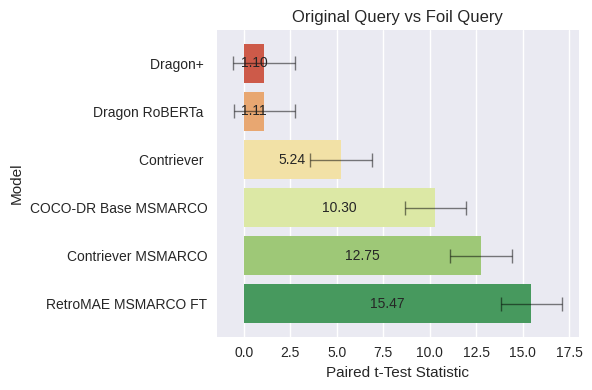

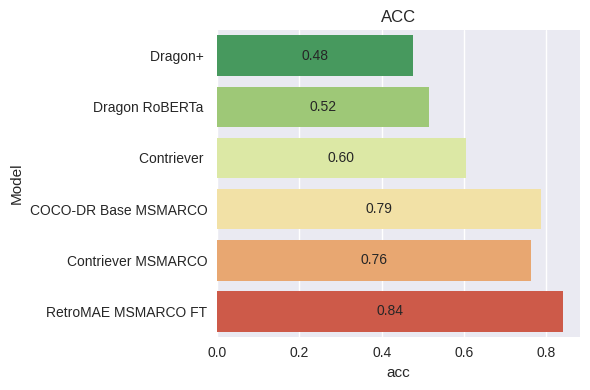

,Model,col1,col2,Paired t-Test Statistic,ttest_pvalue,ttest_ci_low,ttest_ci_high,acc,mean_diff,std_diff,n
0,Dragon+,facebook/dragon-plus-query-encoder_query_origsents_complete_dot,facebook/dragon-plus-query-encoder_query_foilsents_complete_dot,1.102697,2.712234e-01,1.650996,1.650996,0.476,0.460542,6.603632,250
0,Dragon RoBERTa,facebook/dragon-roberta-query-encoder_query_origsents_complete_dot,facebook/dragon-roberta-query-encoder_query_foilsents_complete_dot,1.106281,2.696725e-01,1.650996,1.650996,0.516,0.869488,12.427056,250
0,Contriever,facebook/contriever_query_origsents_complete_dot,facebook/contriever_query_foilsents_complete_dot,5.240334,3.417910e-07,1.650996,1.650996,0.604,0.031138,0.093952,250
0,COCO-DR Base MSMARCO,OpenMatch/cocodr-base-msmarco_query_origsents_complete_dot,OpenMatch/cocodr-base-msmarco_query_foilsents_complete_dot,10.304205,5.729738e-21,1.650996,1.650996,0.788,1.250541,1.918905,250
0,Contriever MSMARCO,facebook/contriever-msmarco_query_origsents_complete_dot,facebook/contriever-msmarco_query_foilsents_complete_dot,12.754362,5.216297e-29,1.650996,1.650996,0.764,0.126652,0.157008,250
0,RetroMAE MSMARCO FT,Shitao/RetroMAE_MSMARCO_finetune_query_origsents_complete_dot,Shitao/RetroMAE_MSMARCO_finetune_query_foilsents_complete_dot,15.467330,2.809801e-38,1.650996,1.650996,0.840,3.480517,3.557938,250


In [135]:
df = df_dot.copy()
print(plot_col_dots)

def standard_ttest_ppf(n, confidence_level=0.95):
    return stats.t.ppf(q=1-confidence_level, df=n-1, loc=0, scale=1)

results_df = pd.DataFrame()
for query_model, context_model, POOLING in tqdm(cfgs):
    ### T-TEST
    rdf = []
    for col1 in plot_col_dots:
        for col2 in plot_col_dots:
            if query_model == col1.split("_query")[0] and query_model == col2.split("_query")[0] and col1 != col2 and "query_orig" in col1:
                rdf.append({
                    "query_model": query_model,
                    "col1": col1,
                    "col2": col2,
                    "ttest_stats": stats.ttest_rel(df[col1], df[col2])[0],
                    "ttest_pvalue": stats.ttest_rel(df[col1], df[col2])[1],
                    "ttest_ci_low": np.abs(standard_ttest_ppf(len(df))),
                    "ttest_ci_high": np.abs(standard_ttest_ppf(len(df))),
                    "acc": (df[col1] > df[col2]).mean(),
                    "mean_diff": (df[col1] - df[col2]).mean(),
                    "std_diff": (df[col1] - df[col2]).std(),
                    "n": len(df),
                })
    rdf = pd.DataFrame(rdf)
    results_df = pd.concat([results_df, rdf]).sort_values("ttest_stats", ascending=True)

### PLOT
model_mappings = {
    "OpenMatch/cocodr-base-msmarco": ("COCO-DR", "Base MSMARCO"),
    "Shitao/RetroMAE_MSMARCO_finetune": ("RetroMAE", "MSMARCO FT"),
    "Shitao/RetroMAE_MSMARCO": ("RetroMAE", "MSMARCO"),
    "Shitao/RetroMAE": ("RetroMAE", ""),
    "facebook/contriever-msmarco": ("Contriever", "MSMARCO"),
    "facebook/contriever": ("Contriever", ""),
    "facebook/dragon-plus-query-encoder": ("Dragon+", ""),
    "facebook/dragon-roberta-query-encoder": ("Dragon RoBERTa", ""),
}
results_df["query_model"] = results_df["query_model"].apply(lambda x: model_mappings[x][0] + " " + model_mappings[x][1])
results_df.rename(columns={"ttest_stats": "Paired t-Test Statistic", "query_model": "Model"}, inplace=True)
plt.figure(figsize=(6, 4))
plt.title("Original Query vs Foil Query")
ax = sns.barplot(data=results_df, y="Model", x="Paired t-Test Statistic", palette=sns.color_palette("RdYlGn"), hue="Model")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=10)
ax.errorbar(x=results_df["Paired t-Test Statistic"], y=results_df["Model"], xerr=results_df[["ttest_ci_low", "ttest_ci_high"]].T.to_numpy(), fmt="none", c="k", capsize=5, elinewidth=1, markeredgewidth=1, alpha=0.5)
results_df.to_json("results/relation_df.json", orient="records")
# ax.bar_label(ax.containers[0], labels=[f"{s:.2f}" for s, p in zip(results_df["Paired t-Test Statistic"], results_df["ttest_pvalue"])], fontsize=10, fmt='%.2f', label_type='center', color='white')
# ax.bar_label(ax.containers[1], labels=[f"{s:.2f}" for s, p in zip(results_df["Paired t-Test Statistic"], results_df["ttest_pvalue"])], fontsize=10, fmt='%.2f', label_type='center', color='white')

plt.tight_layout()
plt.savefig("figs/relation_ttest.pdf")
plt.show()

### PLOT T-TEST
plt.figure(figsize=(6, 4))
plt.title(f"ACC")
ax = sns.barplot(
    data=results_df, y="Model", x="acc", palette=sns.color_palette("RdYlGn_r"), hue="Model",
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=10)
plt.tight_layout()
plt.show()


results_df

In [144]:
df = df_dot.copy()
df["dragon+_diff"] = df["facebook/dragon-plus-query-encoder_query_origsents_complete_dot"] - df["facebook/dragon-plus-query-encoder_query_foilsents_complete_dot"]
df[["query_orig", "query_foil", "relations_orig", "relation_foil", "sents_complete", "dragon+_diff"]].sort_values("dragon+_diff", ascending=True).head(20)

,query_orig,query_foil,relations_orig,relation_foil,sents_complete,dragon+_diff
2180,When was Dmitri Shostakovich born?,Who is the sibling of Dmitri Shostakovich?,"{P569, P570, P737}",P3373,"In music , a fugue ( ) is a contrapuntal compositional technique in two or more voices , built on a subject ( a musical theme ) that is introduced at the beginning in imitation ( repetition at different pitches ) and which recurs frequently in the course of the composition . It is not to be confused with a fuguing tune , which is a style of song popularized by and mostly limited to early American ( i.e. shape note or "" Sacred Harp "" ) music and West Gallery music . A fugue usually has three main sections : an exposition , a development and a final entry that contains the return of the subject in the fugue 's tonic key . Some fugues have a recapitulation . In the Middle Ages , the term was widely used to denote any works in canonic style ; by the Renaissance , it had come to denote specifically imitative works . Since the 17th century , the term fugue has described what is commonly regarded as the most fully developed procedure of imitative counterpoint . Most fugues open with a short main theme , the subj...",-14.467255
4726,Where did Eva Bosáková-Hlaváčková die?,Which sports team is Eva Bosáková-Hlaváčková a member of?,"{P20, P31, P582, P580, P1344, P279, P570, P569, P710, P463, P150, P131, P27, P19, P17}",P54,"Eva Bosáková - Hlaváčková , née Věchtová ( 18 December 1931 in Mladá Boleslav – 10 November 1991 in Prague ) was a Czech gymnast whose career spanned at least from the 1954 World Championships to the 1962 World Championships . Her father was also a gymnast for the Czech national team at the 1936 Berlin Olympics . She and Věra Čáslavská led the Czech women 's gymnastics team to three successive World / Olympic silver medals in a row ( 1958 Worlds , 1960 Olympics , 1962 Worlds ) , establishing their nation as the foremost challengers to the dominant Soviet women 's team during that era . On balance beam , where she is credited for being the first woman gymnast to compete a cartwheel ( at the 1956 Olympics ) , she was World ( 1962 ) and Olympic ( 1960 ) champion , and she was good enough on all four events combined to become All - Around silver medalist at two consecutive World Championships ( 1958 , 1962 ) . After her competitive career was over , she became a member of the Czechoslovak Song and Dance Ensem...",-13.619568
4729,When did Eva Bosáková-Hlaváčková die?,Which sports team is Eva Bosáková-Hlaváčková a member of?,"{P20, P31, P582, P580, P1344, P279, P570, P569, P710, P463, P150, P131, P27, P19, P17}",P54,"Eva Bosáková - Hlaváčková , née Věchtová ( 18 December 1931 in Mladá Boleslav – 10 November 1991 in Prague ) was a Czech gymnast whose career spanned at least from the 1954 World Championships to the 1962 World Championships . Her father was also a gymnast for the Czech national team at the 1936 Berlin Olympics . She and Věra Čáslavská led the Czech women 's gymnastics team to three successive World / Olympic silver medals in a row ( 1958 Worlds , 1960 Olympics , 1962 Worlds ) , establishing their nation as the foremost challengers to the dominant Soviet women 's team during that era . On balance beam , where she is credited for being the first woman gymnast to compete a cartwheel ( at the 1956 Olympics ) , she was World ( 1962 ) and Olympic ( 1960 ) champion , and she was good enough on all four events combined to become All - Around silver medalist at two consecutive World Championships ( 1958 , 1962 ) . After her competitive career was over , she became a member of the Czechoslovak Song and Dance Ensem...",-13.290009
5049,Which country is Invader a citizen of?,Who influenced Invader?,"{P50, P276, P569, P364, P131, P800, P17, P170, P37, P27, P19}",P737,"Zevs ( born Christophe Aguirre Schwarz on 17 November 1977 in Saverne , France ) is a French street artist , best known for his trademark "" liquidation "" technique . He